# Week 4: Fourier transform: filtering and sampling

The exercise of this week is about Fourier Transform, image filtering and sampling. First load the following libraries that will be necessary.

In [1]:
!pip install scipy
!pip install scikit-image

In [28]:
%matplotlib inline

from time import time
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import convolve
from scipy.fftpack import fft2, ifft2, fftshift
from matplotlib.pyplot import imshow, show, figure
import numpy as np

Load the two images wall.jpg and sidewalk.jpg.

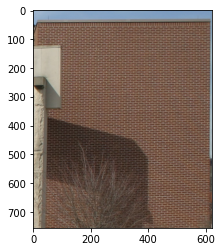

In [25]:
wall = np.array(imread('wall.jpg'), dtype=float) / 255.
wall_gray = rgb2gray(wall)
imshow(wall)

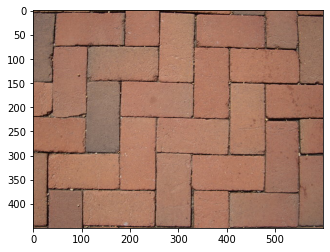

In [26]:
side = np.array(imread('sidewalk.jpg'), dtype=float) / 255.
side_gray = rgb2gray(side)
imshow(side)

Preliminary question: which of the two images has the most low pass content? Which one has the most high pass content?

Answer: wall has more high pass content, and side has more low pass content?

The following functions will be useful in the course of this tutorial: *fft2*, *ifft2*, *convolve* from scipy and the following function:

In [27]:
def gaussian_filter(shape, sigma):
    """
    Returns a 2D gaussian filter specified by its shape and standard deviation.
    """
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

## Part A: Filtering

Create three Gaussian filters:
- one 5x5 Gaussian low pass filter with standard deviation 1
- one 15x15 Gaussian high pass filter with standard deviation 3.5. Hint: the high pass content of an image can be extracted by subtracting the low pass filtered image from the original image. Hence, you can get a high pass filter kernel from a low pass one by subtracting the low pass filter kernel from a unit impulse filter. A unit impulse filter is a filter full of 0s with a single 1 in the middle, that once convolved with an image returns the same image.
- one band pass filter. To do this, create first a 15x15 Gaussian filter with standard deviation 1 and then convolve this low pass filter with the previous high pass filter to create the band pass filter. Indeed, convolution is associative: img * band_pass = (img * low_pass) * high_pass = img * (low_pass * high_pass).

You can then visualize your filters in spatial and frequency domains (using *fft2* and *fftshift* from scipy for the latter). Since the filters are complex in the frequency domain, use *np.abs()* to display the magnitude of the filter.

Low Pass Filter in spatial domain


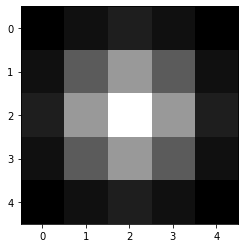

Low Pass Filter in frequency domain


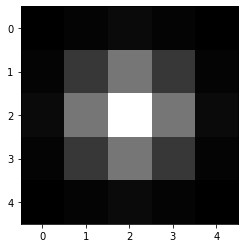

High Pass Filter in spatial domain


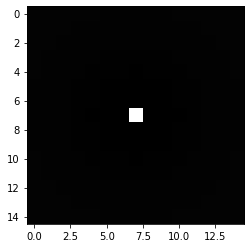

High Pass Filter in frequency domain


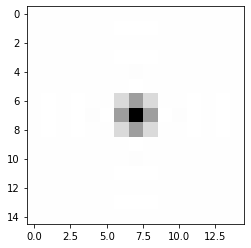

Band Pass Filter in spatial domain


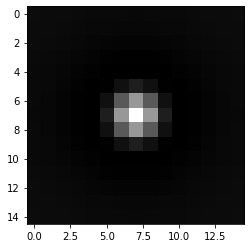

Band Pass Filter in frequency domain


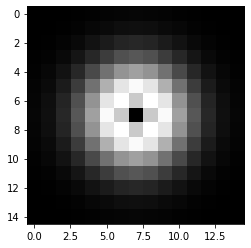

In [34]:
# Low pass filter
# Enter your code here
low_pass_filter = gaussian_filter((5,5), 1)
print("Low Pass Filter in spatial domain")
imshow(low_pass_filter, cmap='gray')
show()
print("Low Pass Filter in frequency domain")
#print("no shift")
#imshow(np.abs(fft2(low_pass_filter)), cmap='gray')
#show()
#print("with shift")
imshow(np.abs(fftshift(fft2(low_pass_filter))), cmap='gray')
show()

# High pass filter
# Enter your code here
identity = np.zeros((15,15))
identity[7][7] = 1
#print(identity)
#print(identity - gaussian_filter((15,15), 3.5))
high_pass_filter = identity - gaussian_filter((15,15), 3.5)
print("High Pass Filter in spatial domain")
imshow(high_pass_filter, cmap='gray')
show()
print("High Pass Filter in frequency domain")
imshow(np.abs(fftshift(fft2(high_pass_filter))), cmap='gray')
show()

# Band pass filter
# Enter your code here
band_pass_filter = convolve(gaussian_filter((15,15), 1), high_pass_filter)

print("Band Pass Filter in spatial domain")
imshow(band_pass_filter, cmap='gray')
show()
print("Band Pass Filter in frequency domain")
imshow(np.abs(fftshift(fft2(band_pass_filter))), cmap='gray')
show()

Apply these three filters to the two sample grayscale images in spatial domain first by convolving the image with the kernel, and in frequency domain secondly by taking the Fourier tranform of both the image and the filter kernel and multiplying them. Compare the runtimes of spatial and frequency domain filtering, using the *time* function of python. Compare the filtering results of two images by visualizing the filtered images in both spatial and frequency domains. Check that your initial guess about the low/high pass content of the images is correct.

### Filtering in spatial domain

Original image:


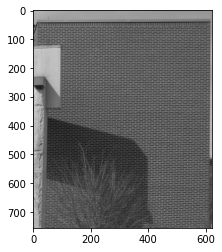

Low Pass spatial:


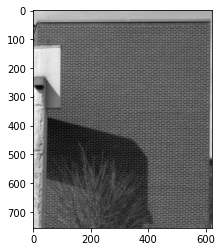

--- 0.04399371147155762 seconds ---

High Pass spatial:


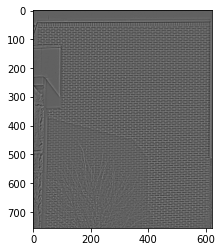

--- 0.2297687530517578 seconds ---

Band Pass spatial:


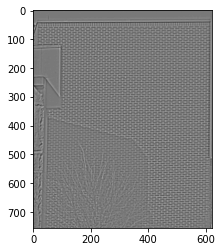

--- 0.14055371284484863 seconds ---



In [46]:
print("Original image:")
imshow(wall_gray, cmap='gray')
show()

print("Low Pass spatial:")
start_time = time()
imshow(convolve(wall_gray, low_pass_filter), cmap='gray')
end_time = time()
show()
print("--- %s seconds ---" % (end_time - start_time))
print()

print("High Pass spatial:")
start_time = time()
imshow(convolve(wall_gray, high_pass_filter), cmap='gray')
end_time = time()
show()
print("--- %s seconds ---" % (end_time - start_time))
print()

print("Band Pass spatial:")
start_time = time()
imshow(convolve(wall_gray, band_pass_filter), cmap='gray')
end_time = time()
show()
print("--- %s seconds ---" % (end_time - start_time))
print()

# Enter your code here

Original image:


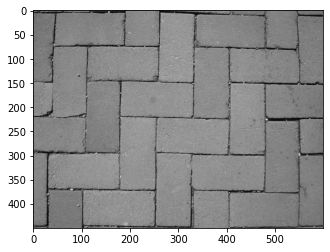

Low Pass spatial:


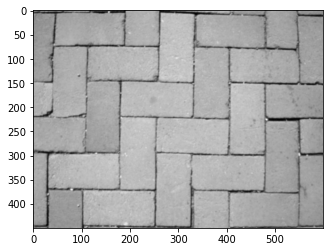

--- 0.03625130653381348 seconds ---

High Pass spatial:


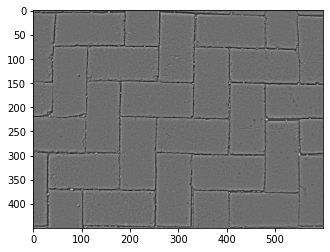

--- 0.09402728080749512 seconds ---

Band Pass spatial:


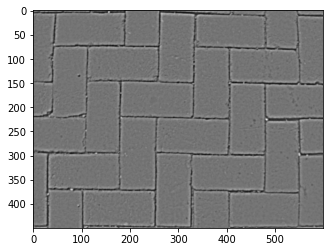

--- 0.09056353569030762 seconds ---



In [47]:
print("Original image:")
imshow(side_gray, cmap='gray')
show()

start_time = time()
imshow(convolve(side_gray, low_pass_filter), cmap='gray')
end_time = time()
print("Low Pass spatial:")
show()
print("--- %s seconds ---" % (end_time - start_time))
print()

start_time = time()
imshow(convolve(side_gray, high_pass_filter), cmap='gray')
end_time = time()
print("High Pass spatial:")
show()
print("--- %s seconds ---" % (end_time - start_time))
print()

start_time = time()
imshow(convolve(side_gray, band_pass_filter), cmap='gray')
end_time = time()
print("Band Pass spatial:")
show()
print("--- %s seconds ---" % (end_time - start_time))
print()

# Enter your code here

### Filtering in frequency domain

Note: the output of *ifft2* is a numpy array with complex values. You can use the command *.astype(float)* to convert it back to real numbers.

... frequency domain secondly by taking the Fourier tranform of both the image and the filter kernel and multiplying them...

Original image:


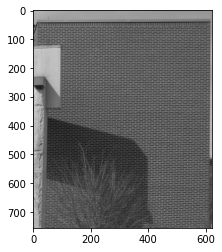

Low Pass frequency:


C:\Users\jenny\AppData\Local\Temp/ipykernel_17428/1751032088.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')


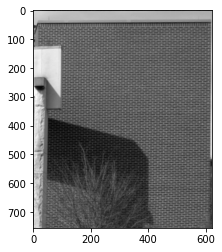

--- 0.15613794326782227 seconds ---

High Pass frequency:


C:\Users\jenny\AppData\Local\Temp/ipykernel_17428/1751032088.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')


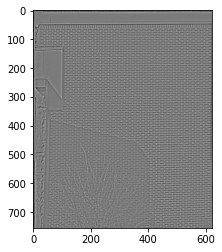

--- 0.1329190731048584 seconds ---

Band Pass frequency:


C:\Users\jenny\AppData\Local\Temp/ipykernel_17428/1751032088.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')


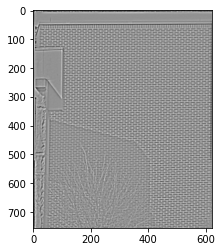

--- 0.1425457000732422 seconds ---



In [56]:
print("Original image:")
imshow(wall_gray, cmap='gray')
show()

print("Low Pass frequency:")
start_time = time()
wall_fourier = fft2(wall_gray)
filter = fft2(low_pass_filter, shape = wall_gray.shape)
imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')
end_time = time()
show()
print("--- %s seconds ---" % (end_time - start_time))
print()

print("High Pass frequency:")
start_time = time()
wall_fourier = fft2(wall_gray)
filter = fft2(high_pass_filter, shape = wall_gray.shape)
imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')
end_time = time()
show()
print("--- %s seconds ---" % (end_time - start_time))
print()

print("Band Pass frequency:")
start_time = time()
wall_fourier = fft2(wall_gray)
filter = fft2(band_pass_filter, shape = wall_gray.shape)
imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')
end_time = time()
show()
print("--- %s seconds ---" % (end_time - start_time))
print()

# Enter your code here

Original image:


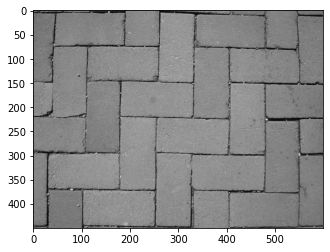

Low Pass frequency:


C:\Users\jenny\AppData\Local\Temp/ipykernel_17428/255207810.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')


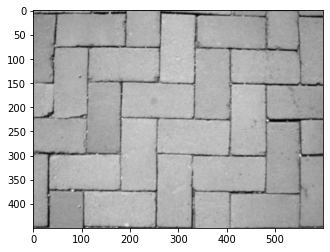

C:\Users\jenny\AppData\Local\Temp/ipykernel_17428/255207810.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')


--- 0.06321477890014648 seconds ---

High Pass frequency:


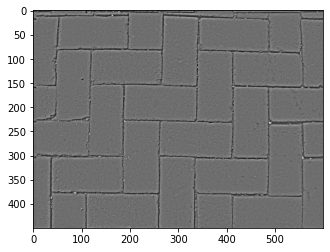

--- 0.057591915130615234 seconds ---

Band Pass frequency:


C:\Users\jenny\AppData\Local\Temp/ipykernel_17428/255207810.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')


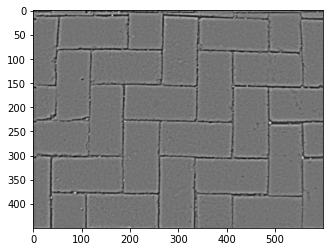

--- 0.04732656478881836 seconds ---



In [59]:
print("Original image:")
imshow(side_gray, cmap='gray')
show()

print("Low Pass frequency:")
start_time = time()
wall_fourier = fft2(side_gray)
filter = fft2(low_pass_filter, shape = side_gray.shape)
imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')
end_time = time()
show()
print("--- %s seconds ---" % (end_time - start_time))
print()

print("High Pass frequency:")
start_time = time()
wall_fourier = fft2(side_gray)
filter = fft2(high_pass_filter, shape = side_gray.shape)
imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')
end_time = time()
show()
print("--- %s seconds ---" % (end_time - start_time))
print()

print("Band Pass frequency:")
start_time = time()
wall_fourier = fft2(side_gray)
filter = fft2(band_pass_filter, shape = side_gray.shape)
imshow(ifft2(wall_fourier * filter).astype(float), cmap='gray')
end_time = time()
show()
print("--- %s seconds ---" % (end_time - start_time))
print()


# Enter your code here

## Part B: Sampling

Downsample both images to one fourth of the resolution by taking every second row and column. You can use numpy array slicing for this: *my_array[start:end:step]*. Compare the results in terms of distortions and unexpected effects. Explain why the quality of the two downsampled images differ. 

(756, 622, 3) (252, 208, 3)


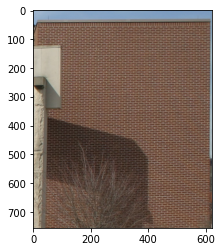

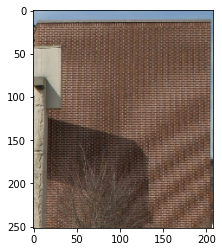

(450, 600, 3) (150, 200, 3)


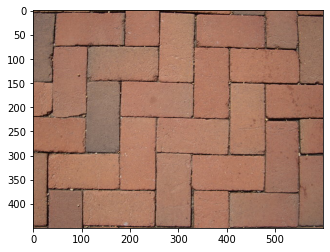

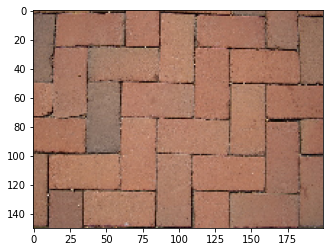

In [119]:
# Enter your code here

s = 3

wall_downsampled = wall[::s,::s, :] #wall[0:-1:2,0:-1:2]
print(wall.shape, wall_downsampled.shape)
imshow(wall)
show()
imshow(wall_downsampled)
show()

side_downsampled = side[::s, ::s, :] #side[0:-1:2,0:-1:2]
print(side.shape, side_downsampled.shape)
imshow(side)
show()
imshow(side_downsampled)
show()

Create three 15x15 Gaussian low pass filters with standard deviations 0.5, 1 and 1.5 and apply them to the color image wall.jpg. You can filter the three channels separately and gather them in an RGB image with the numpy function *np.stack([r_img, g_img, b_img], axis=-1)*. Downsample the three filtered images to one fourth resolution. Compare the resulting downsampled images in terms of quality.

Wall filtered sd: 0.5
Wall filtered sd: 1
Wall filtered sd: 1.5
original


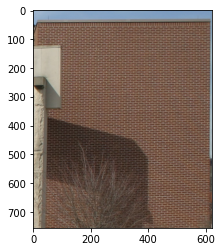

Wall filtered & downsampled sd: 0.5


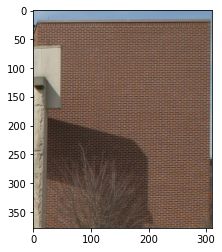

Wall filtered & downsampled sd: 1


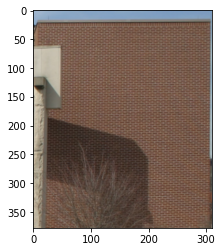

Wall filtered & downsampled sd: 1.5


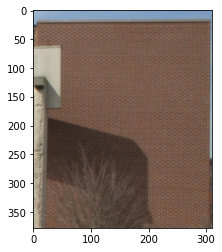

In [75]:
# Create the filters
# Enter your code here

filter_05 = gaussian_filter((15,15), 0.5)
filter_1  = gaussian_filter((15,15), 1)
filter_15 = gaussian_filter((15,15), 1.5)

# Convolve them with the RGB image
# Enter your code here
r_img = convolve(wall[:,:,0], filter_05)
g_img = convolve(wall[:,:,1], filter_05)
b_img = convolve(wall[:,:,2], filter_05)

wall_05 = np.stack([r_img, g_img, b_img], axis=-1)
print("Wall filtered sd: 0.5")
#imshow(wall_05)
#show()

r_img = convolve(wall[:,:,0], filter_1)
g_img = convolve(wall[:,:,1], filter_1)
b_img = convolve(wall[:,:,2], filter_1)

wall_1  = np.stack([r_img, g_img, b_img], axis=-1)
print("Wall filtered sd: 1")
#imshow(wall_1)
#show()

r_img = convolve(wall[:,:,0], filter_15)
g_img = convolve(wall[:,:,1], filter_15)
b_img = convolve(wall[:,:,2], filter_15)

wall_15 = np.stack([r_img, g_img, b_img], axis=-1)
print("Wall filtered sd: 1.5")
#imshow(wall_15)
#show()

# Downsample the resulting images
# Enter your code here

print("original")
imshow(wall)
show()

print("Wall filtered & downsampled sd: 0.5")
imshow(wall_05[::2,::2, :])
show()

print("Wall filtered & downsampled sd: 1")
imshow(wall_1[::2,::2, :])
show()

print("Wall filtered & downsampled sd: 1.5")
imshow(wall_15[::2,::2, :])
show()



## Bonus: for those that finished earlier

Load the blurred road signs image and using your fresh knowledge about filters, design the perfect filter to make the text readable.

C:\Users\jenny\AppData\Local\Temp/ipykernel_17428/2304151098.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  blurred_road_signs = np.array(imread('blurred_road_signs.jpg', as_gray=True), dtype=np.float) / 255.


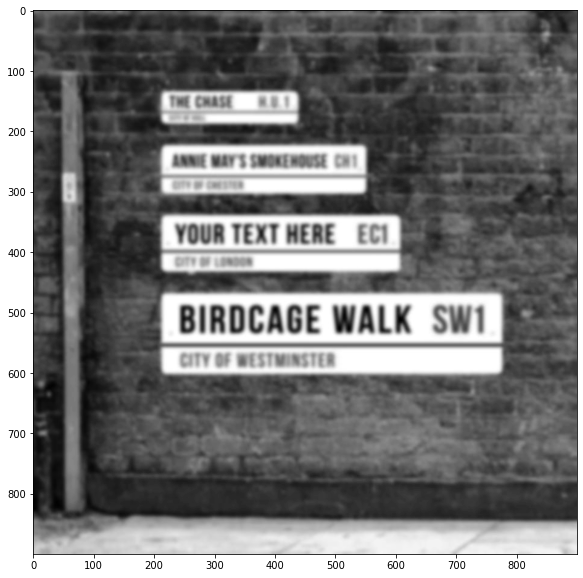

In [89]:
blurred_road_signs = np.array(imread('blurred_road_signs.jpg', as_gray=True), dtype=np.float) / 255.

figure(figsize=(10, 10))
imshow(blurred_road_signs, cmap='gray')
show()



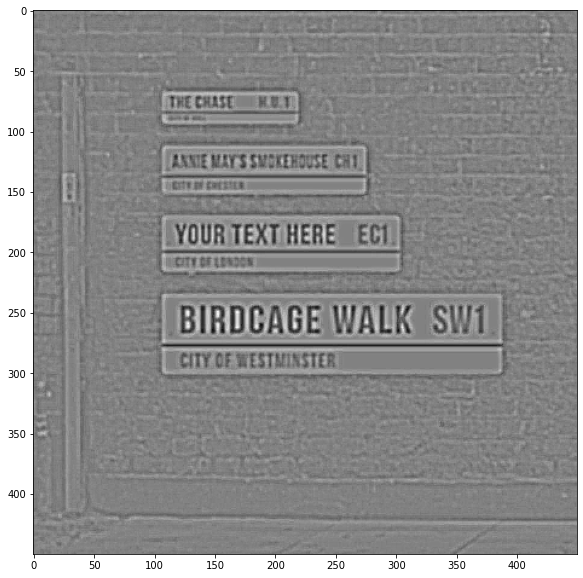

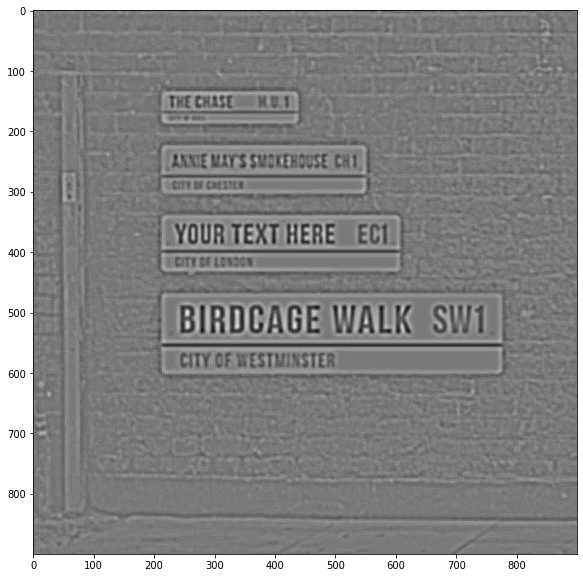

In [118]:
n = 15
center = (int) (n / 2)
sharpen_filter = np.zeros((n,n))
sharpen_filter[center,center] = 1
sharpen_filter -= gaussian_filter((n,n), 1.5)


sharpened = convolve(blurred_road_signs, sharpen_filter)

figure(figsize=(10, 10))
#imshow(ifft2(fft2(blurred_road_signs) * fft2(band_pass_filter, blurred_road_signs.shape)).astype(float)[::2,::2], cmap="gray")
imshow(sharpened[::2,::2], cmap="gray")
show()

figure(figsize=(10, 10))
imshow(sharpened, cmap="gray")
show()

